In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

In [11]:
mobiles = pd.read_csv("./train.csv")

In [12]:
X = mobiles.iloc[1:,0:20].values
y = mobiles.iloc[1:,20].values

In [13]:
# X = X.T
for i, x in enumerate(X):
    minVal = np.min(x)
    norm_x = np.subtract(x, minVal)
    maxVal = np.max(norm_x)
    norm_x = np.divide(norm_x, maxVal)
    X[i] = norm_x
# X = X.T
# print(X[0])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
K_VALUES = [1,3,5,7,9,11,13,15]
K_ACCURACY = []
for K in K_VALUES:
    match = 0
    total = 0
    for test_point_index,test_point in enumerate(X_test):
        # print(test_point)
        # print(X_test[test_point_index])
        distances_dict = Counter()
        class_count = Counter()

        for index,train_point in enumerate(X_train):
            distances_dict[index] = np.sum(np.square(test_point - train_point))

        for point_index,point in distances_dict.most_common()[-K:]:
            # print(point_index,point)
            class_count[y_train[point_index]] += 1
        # print("------")
        # print(class_count.most_common(1)[0][0],y_test[test_point_index])
        if class_count.most_common(1)[0][0] == y_test[test_point_index]:
            match += 1
        total += 1
    print(match/total)
    K_ACCURACY.append(match/total)

0.5625
0.565
0.585
0.55
0.59
0.565
0.575
0.5675


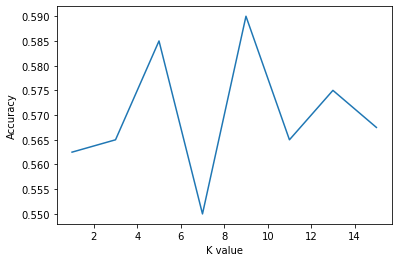

In [16]:
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.plot(K_VALUES, K_ACCURACY)
plt.show()